In [10]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## I. Analyse descriptive

### I.1. Structure des données

In [11]:
# Chemin du fichier HDF5
file_path = "Dataset/TimeSeries_Scenario_00001_ScenarioInstanceRandint_id_0001.h5"

# Ouvrir le fichier HDF5 en mode lecture
with h5py.File(file_path, 'r') as hdf:
    # Lister les groupes de données dans le fichier
    for group in hdf.keys():
        print(f"Groupe : {group}")
        
        # Parcourir les datasets (jeux de données) dans chaque groupe
        for dataset in hdf[group].keys():
            data = hdf[group][dataset]
            print(f"  Dataset : {dataset}")
            print(f"    - Shape : {data.shape}")
            print(f"    - Type : {data.dtype}")
            #print(hdf[group][dataset][:])

Groupe : df
  Dataset : axis0
    - Shape : (135,)
    - Type : |S64
  Dataset : axis1
    - Shape : (3582,)
    - Type : int64
  Dataset : block0_items
    - Shape : (128,)
    - Type : |S64
  Dataset : block0_values
    - Shape : (3582, 128)
    - Type : float32
  Dataset : block1_items
    - Shape : (4,)
    - Type : |S51
  Dataset : block1_values
    - Shape : (3582, 4)
    - Type : int32
  Dataset : block2_items
    - Shape : (3,)
    - Type : |S34
  Dataset : block2_values
    - Shape : (3582, 3)
    - Type : float64



Nous pouvons voir que les données comprennent 135 variables, dont les noms sont stockés dans le dataset axis0, et 3583 points temporels (dont les noms sont stockés dans le dataset axis1). De plus, les données sont divisées en 3 blocs de données différents, avec les noms des variables dans chaque bloc stockés dans le dataset _items et les valeurs dans le dataset _values. 

In [12]:
# Chemin du fichier HDF5
file_path = "Dataset/TimeSeries_Scenario_00001_ScenarioInstanceRandint_id_0001_shift_on___flight_director_pitch__flight_director_roll.h5"

# Liste pour stocker les DataFrames de chaque bloc de données
dataframes = []

# Ouvrir le fichier HDF5
with h5py.File(file_path, 'r') as hdf:
    # Parcourir chaque dataset dans le groupe 'df'
    group = hdf['df']
    for i in range(3):  # Itérer à travers block0, block1, block2
        # Lire les noms des colonnes depuis _items
        col_names = group[f'block{i}_items'][:].astype(str)
        # Lire les valeurs depuis _values
        values = group[f'block{i}_values'][:]
        # Créer un DataFrame avec les valeurs et les noms de colonnes
        df = pd.DataFrame(values, columns=col_names)
        # Ajouter le DataFrame à la liste
        dataframes.append(df)

# Concaténer tous les DataFrames en un seul DataFrame final
data = pd.concat(dataframes, axis=1)

data.shape

(3582, 137)

In [15]:
data['sim/cockpit/autopilot/flight_director_pitch_ground_truth']

0       0.017744
1      -0.070592
2      -0.179166
3      -0.284005
4      -0.365164
          ...   
3577    5.067928
3578    5.068606
3579    5.069308
3580    5.069987
3581    5.070647
Name: sim/cockpit/autopilot/flight_director_pitch_ground_truth, Length: 3582, dtype: float32

### I.2. Valeurs manquantes

In [5]:
missing_values_count = data.isnull().sum().sum()
print(missing_values_count)

0


### I.3. Analyse univariée

In [6]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

constant_columns

['sim/flightmodel/controls/ail_trim',
 'sim/flightmodel/controls/rail2def',
 'sim/flightmodel/engine/ENGN_heat0',
 'sim/flightmodel/engine/ENGN_heat1',
 'sim/flightmodel/position/lat_ref',
 'sim/flightmodel/position/lon_ref',
 'sim/flightmodel/weight/m_fixed',
 'sim/flightmodel2/controls/aileron_trim',
 'sim/flightmodel2/controls/incidence_ratio',
 'sim/flightmodel2/controls/rotor_trim',
 'sim/flightmodel2/controls/rudder_trim',
 'sim/flightmodel2/controls/speedbrake_ratio',
 'sim/multiplayer/controls/engine_pitch_request0',
 'sim/cockpit2/temperature/outside_air_temp_is_metric']

#### Distributions

In [46]:
# # Histogrammes pour les premières colonnes
# data.hist(bins=20, grid=False)
# plt.suptitle("Distribution des variables dans block0_values")
# plt.show()

#### Évolution temporelle des variables

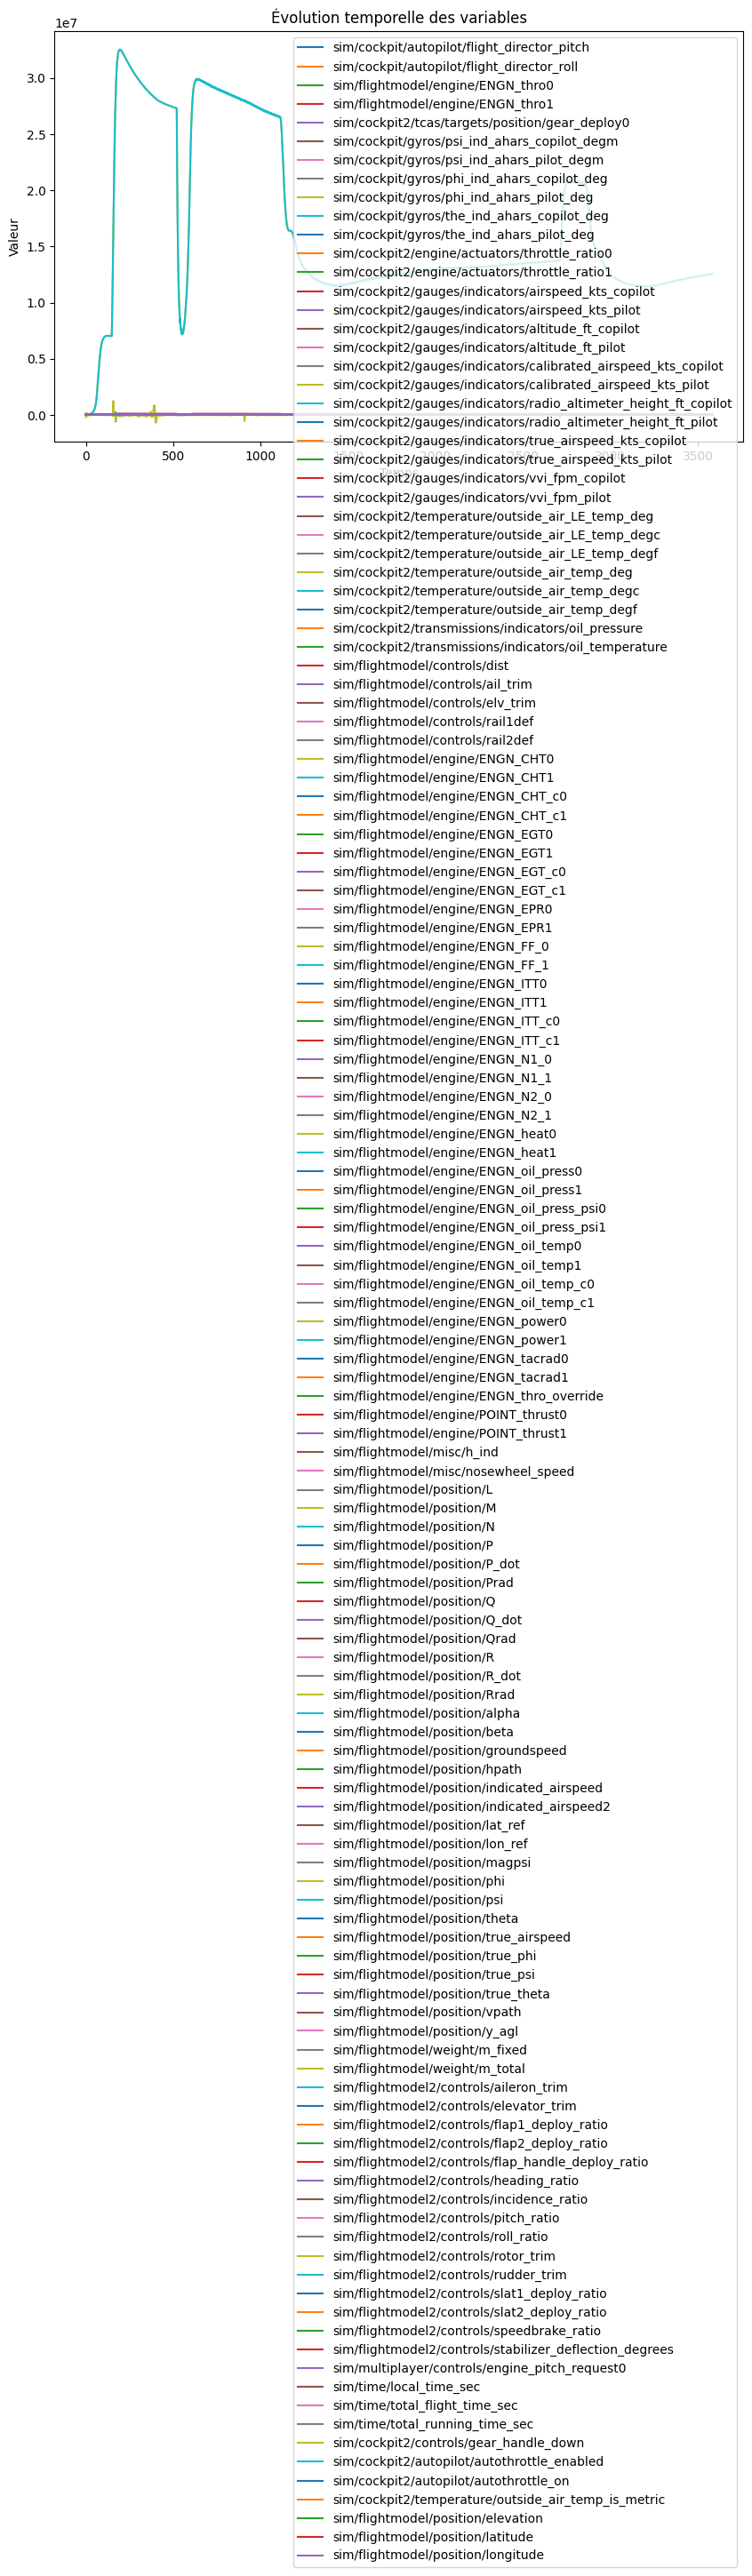

In [44]:
# Visualiser data au cours du temps
plt.figure(figsize=(10, 6))
for col in data.columns[:]:  # Sélectionner quelques colonnes à visualiser
    plt.plot(data[col], label=col)

plt.title("Évolution temporelle des variables")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend()
plt.show()


###  I.4. Analyse bivariée

#### Corrélation

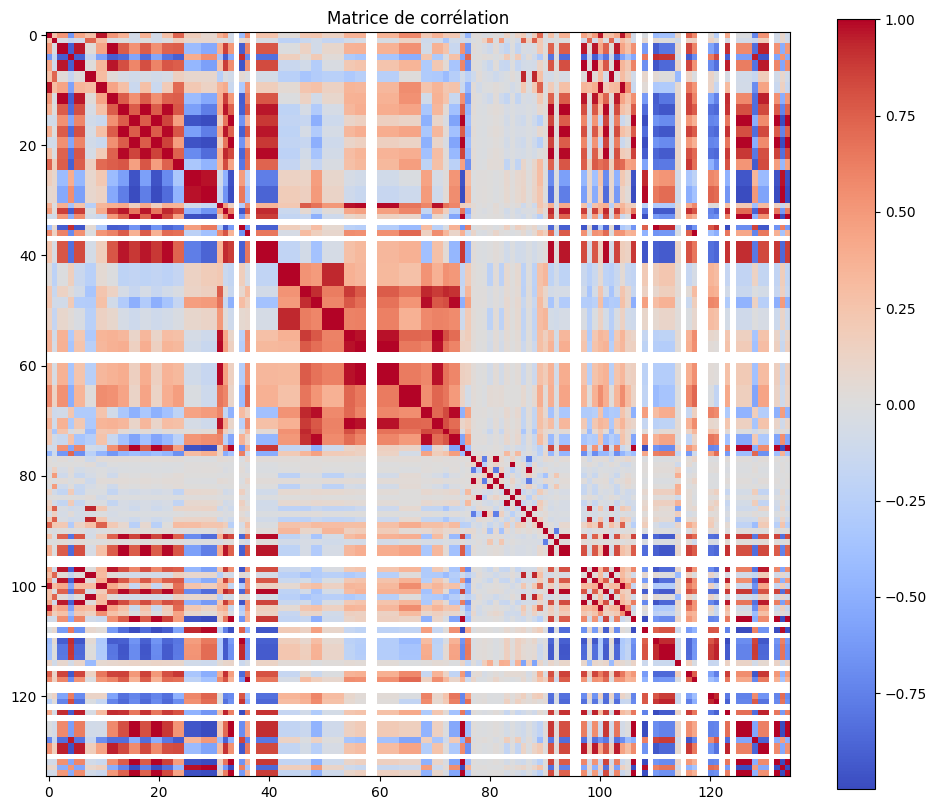

In [42]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Matrice de corrélation")
plt.show()